In [1]:
import numpy as np
from astropy.io import fits
import healpy as hp
import pandas as pd
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict


### Retrieving the relevant CCD Data

In [2]:
decamCCD = fits.open('../../bricks_data/ccds-annotated-decam-dr9.fits')
mosaicCCD = fits.open('../../bricks_data/ccds-annotated-mosaic-dr9.fits')
bassCCD = fits.open('../../bricks_data/ccds-annotated-90prime-dr9.fits')
print(decamCCD[1].columns)


ColDefs(
    name = 'image_filename'; format = '120A'
    name = 'image_hdu'; format = 'I'
    name = 'camera'; format = '5A'
    name = 'expnum'; format = 'K'
    name = 'plver'; format = '8A'
    name = 'procdate'; format = '19A'
    name = 'plprocid'; format = '7A'
    name = 'ccdname'; format = '3A'
    name = 'object'; format = '35A'
    name = 'propid'; format = '10A'
    name = 'filter'; format = '1A'
    name = 'exptime'; format = 'E'
    name = 'mjd_obs'; format = 'D'
    name = 'airmass'; format = 'E'
    name = 'fwhm'; format = 'E'
    name = 'width'; format = 'I'
    name = 'height'; format = 'I'
    name = 'ra_bore'; format = 'D'
    name = 'dec_bore'; format = 'D'
    name = 'crpix1'; format = 'E'
    name = 'crpix2'; format = 'E'
    name = 'crval1'; format = 'D'
    name = 'crval2'; format = 'D'
    name = 'cd1_1'; format = 'E'
    name = 'cd1_2'; format = 'E'
    name = 'cd2_1'; format = 'E'
    name = 'cd2_2'; format = 'E'
    name = 'yshift'; format = 'L'
    name = 

In [3]:
dataDecam = decamCCD[1].data
dataMosaic = mosaicCCD[1].data
dataBass = bassCCD[1].data

In [4]:
print(type(dataMosaic))

<class 'astropy.io.fits.fitsrec.FITS_rec'>


### Extracting CCD Informations from the entire Sample and Concatenating them together

In [9]:
# Extracting Corners Only needed for visualisation

ra0 = np.concatenate((dataDecam.field('ra0'), dataMosaic.field('ra0'), dataBass.field('ra0')), axis=0)
dec0 = np.concatenate((dataDecam.field('dec0'), dataMosaic.field('dec0'), dataBass.field('dec0')), axis=0)

ra1 = np.concatenate((dataDecam.field('ra1'), dataMosaic.field('ra1'), dataBass.field('ra1')), axis=0)
dec1 = np.concatenate((dataDecam.field('dec1'), dataMosaic.field('dec1'), dataBass.field('dec1')), axis=0)

ra2 = np.concatenate((dataDecam.field('ra2'), dataMosaic.field('ra2'), dataBass.field('ra2')), axis=0)
dec2 = np.concatenate((dataDecam.field('dec2'), dataMosaic.field('dec2'), dataBass.field('dec2')), axis=0)

ra3 = np.concatenate((dataDecam.field('ra3'), dataMosaic.field('ra3'), dataBass.field('ra3')), axis=0)
dec3 = np.concatenate((dataDecam.field('dec3'), dataMosaic.field('dec3'), dataBass.field('dec3')), axis=0)


In [19]:
#airmass, fwhm, skysb, exptime, mjd, meansky, galdepths,



#Extracting systematics
filter_colour = np.concatenate((dataDecam.field('filter'), dataMosaic.field('filter'), dataBass.field('filter')), axis=0)

# camera = np.concatenate((dataDecam.field('camera'), dataMosaic.field('camera'), dataBass.field('camera')), axis=0)

exptime = np.concatenate((dataDecam.field('exptime'), dataMosaic.field('exptime'), dataBass.field('exptime')), axis=0)
airmass = np.concatenate((dataDecam.field('airmass'), dataMosaic.field('airmass'), dataBass.field('airmass')), axis=0)
fwhm = np.concatenate((dataDecam.field('fwhm'), dataMosaic.field('fwhm'), dataBass.field('fwhm')), axis=0)
seeing = fwhm * 0.262
ccdskysb = np.concatenate((dataDecam.field('ccdskysb'), dataMosaic.field('ccdskysb'), dataBass.field('ccdskysb')), axis = 0)
mjd_obs =  np.concatenate((dataDecam.field('mjd_obs'), dataMosaic.field('mjd_obs'), dataBass.field('mjd_obs')), axis = 0)
meansky = np.concatenate((dataDecam.field('meansky'), dataMosaic.field('meansky'), dataBass.field('meansky')), axis = 0)
galdepth = np.concatenate((dataDecam.field('galdepth'), dataMosaic.field('galdepth'), dataBass.field('galdepth')), axis = 0)


# sig1 = np.concatenate((dataDecam.field('sig1'), dataMosaic.field('sig1'), dataBass.field('sig1')), axis = 0)
# ccdskycounts = np.concatenate((dataDecam.field('ccdskycounts'), dataMosaic.field('ccdskycounts'), dataBass.field('ccdskycounts')), axis = 0)

# skyrms = np.concatenate((dataDecam.field('skyrms'), dataMosaic.field('skyrms'), dataBass.field('skyrms')), axis=0)

# ccdphrms = np.concatenate((dataDecam.field('ccdphrms'), dataMosaic.field('ccdphrms'), dataBass.field('ccdphrms')), axis = 0)
                          
                          
# phrms = np.concatenate((dataDecam.field('phrms'), dataMosaic.field('phrms'), dataBass.field('phrms')), axis = 0)
                       
                       
# ccdnastrom = np.concatenate((dataDecam.field('ccdnastrom'), dataMosaic.field('ccdnastrom'), dataBass.field('ccdnastrom')), axis = 0)
                            
                            
#ccdnphotom = np.concatenate((dataDecam.field('ccdnphotom'), dataMosaic.field('ccdnphotom'), dataBass.field('ccdnphotom')), axis = 0)
                            
                            

                         
                         
# stdsky = np.concatenate((dataDecam.field('stdsky'), dataMosaic.field('stdsky'), dataBass.field('stdsky')), axis = 0)
                        
                        
# maxsky = np.concatenate((dataDecam.field('maxsky'), dataMosaic.field('maxsky'), dataBass.field('maxsky')), axis = 0)
                        
                        
# minsky = np.concatenate((dataDecam.field('minsky'), dataMosaic.field('minsky'), dataBass.field('minsky')), axis = 0)
                        
                        
# pixscale_mean = np.concatenate((dataDecam.field('pixscale_mean'), dataMosaic.field('pixscale_mean'), dataBass.field('pixscale_mean')), axis = 0)
                               
                               
# pixscale_std = np.concatenate((dataDecam.field('pixscale_std'), dataMosaic.field('pixscale_std'), dataBass.field('pixscale_std')), axis = 0)
                              
                              
                              
# pixscale_max = np.concatenate((dataDecam.field('pixscale_max'), dataMosaic.field('pixscale_max'), dataBass.field('pixscale_max')), axis = 0)
                              
                              
                              
# pixscale_min = np.concatenate((dataDecam.field('pixscale_min'), dataMosaic.field('pixscale_min'), dataBass.field('pixscale_min')), axis = 0)
                              
                              
# galnorm_mean = np.concatenate((dataDecam.field('galnorm_mean'), dataMosaic.field('galnorm_mean'), dataBass.field('galnorm_mean')), axis = 0)
                              
                              
                              
# galnorm_std = np.concatenate((dataDecam.field('galnorm_std'), dataMosaic.field('galnorm_std'), dataBass.field('galnorm_std')), axis = 0)
                             
                             
                             
# humidity = np.concatenate((dataDecam.field('humidity'), dataMosaic.field('humidity'), dataBass.field('humidity')), axis = 0)
                          
                          
# outtemp = np.concatenate((dataDecam.field('outtemp'), dataMosaic.field('outtemp'), dataBass.field('outtemp')), axis = 0)
                         
                         
# tileebv = np.concatenate((dataDecam.field('tileebv'), dataMosaic.field('tileebv'), dataBass.field('tileebv')), axis = 0)
                         
                         
                         
#ebv = np.concatenate((dataDecam.field('ebv'), dataMosaic.field('ebv'), dataBass.field('ebv')), axis = 0)
                     
                     

                          
# gaussgaldepth = np.concatenate((dataDecam.field('gaussgaldepth'), dataMosaic.field('gaussgaldepth'), dataBass.field('gaussgaldepth')), axis = 0)
                               
                               
                               

In [5]:
def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))


NSIDE = 256
NSIDE_SUB = 2048
NPIX = hp.nside2npix(NSIDE)

### Now, trying to actually get all ccds per pixel
Begin by loading the Dictionary mapping pixels to CCDs. Afterwards, iterating through the ccds for a given pixel.
Depending on the systematics, we have to break systematics down into the different bands.
Airmass is simply averaged across all CCDs, exposure times are calculated on a per CCD basis.


### 1. Import Pixel2Subpixel mapping


In [6]:
# Use this cell to simply import an existing pixel2subpixel mapping

with open('../../bricks_data/pixel2subpixel_256_2048.pickle', 'rb') as f:
    pixel2subpixel_dict = pickle.load(f)
    f.close()


### 2. Import pixel2ccd mapping


In [8]:
# For DECAM Only
"""
with open('../bricks_data/brickpixel2ccd_2048.pickle', 'rb') as f:
    subpixel2ccd_dict = pickle.load(f)
    f.close()
"""
# For DECAM, BASS, MzLS
with open('../../bricks_data/pixel2ccd_256.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

In [26]:
df = pd.read_csv('../bricks_data/galaxy_catalogue_sample.csv')

ids = df.BrickID.unique()
hdulistBricksSouthSummary = fits.open('../bricks_data/survey-bricks-dr9-south.fits')
data_south = hdulistBricksSouthSummary[1].data
brickid_south = data_south.field('brickid')
area_south = data_south.field('area')
sky_covered = 0
"""
for i in range(len(brickid_south)):
    if brickid_south[i] in ids:
        sky_covered += area[i]
"""
hdulistBricksNorthSummary = fits.open('../bricks_data/survey-bricks-dr9-north.fits')
data_north = hdulistBricksNorthSummary[1].data
brickid_north = data_north.field('brickid')
area_north = data_north.field('area')
brickids = np.concatenate((brickid_south, brickid_north), axis=0)
area = np.concatenate((area_south, area_north), axis=0)

area = area[np.where(np.unique(brickids))]

brickids = np.unique(brickids)
print(len(brickids), len(area))
for i in range(len(brickids)):
    sky_covered += area[i]

print(sky_covered)

332041 332041
20701.94839429979


### 3. Import subpixel2ccd mapping


In [10]:
# Use this cell to simply import an existing subpixel2ccd mapping

# For DECAM Only
'''
with open('../bricks_data/brickpixel2ccd_2048.pickle', 'rb') as f:
    subpixel2ccd_dict = pickle.load(f)
    f.close()
'''
# For DECAM, BASS, MzLS
with open('../../bricks_data/pixel2ccd_2048_non_inclusive.pickle', 'rb') as f:
    subpixel2ccd_dict = pickle.load(f)
    f.close()

In [10]:
# Validate the subpixel2ccd_dict is correct

subpixel_keys = subpixel2ccd_dict.keys()
print(len(subpixel_keys))
print("All subpixels for pixel:", pixel2subpixel_dict[459294])
print("All CCD's for pixel:", pixel2ccd_dict[459294])
print("All CCD's for subpixel:", subpixel2ccd_dict[29364464])


28778546
All subpixels for pixel: [29364464, 29372655, 29372656, 29380847, 29380848, 29380849, 29389038, 29389039, 29389040, 29389041, 29397230, 29397231, 29397232, 29397233, 29397234, 29405421, 29405422, 29405423, 29405424, 29405425, 29405426, 29413613, 29413614, 29413615, 29413616, 29413617, 29413618, 29413619, 29421804, 29421805, 29421806, 29421807, 29421808, 29421809, 29421810, 29421811, 29429997, 29429998, 29429999, 29430000, 29430001, 29430002, 29430003, 29438189, 29438190, 29438191, 29438192, 29438193, 29438194, 29446382, 29446383, 29446384, 29446385, 29446386, 29454574, 29454575, 29454576, 29454577, 29462767, 29462768, 29462769, 29470959, 29470960, 29479152]
All CCD's for pixel: [3844955, 3844960, 3844961, 3844966, 3844967, 4633849, 4633850, 4633855, 4633856, 4633863, 4970525, 4970531, 4970537, 4970591, 4970597, 4970603, 4970604, 5054410, 5054411, 5054416, 5054417, 5054424, 5062518, 5062524, 5062530, 5062531, 5062757, 5062763, 5062769, 5150348, 5150353, 5150354, 5150359, 515036

### 4. Visualising the 3 components together
- Pixel2Subpixel
- Pixel2CCD
- Subpixel2CCD

Number of CCDs per subpixel: 9


<ipython-input-16-4c0946083e98>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pixel_boundary = hp.boundaries(nside=NSIDE_SUB, pix=29364464, step=1)
<ipython-input-16-4c0946083e98>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#dep

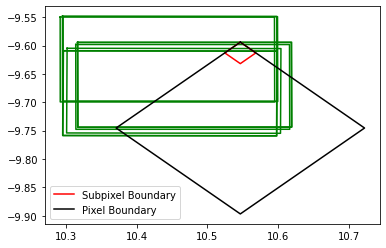

In [16]:
# Plotting the geometric attributes

ccds_per_pixel = subpixel2ccd_dict[29364464]
print("Number of CCDs per subpixel:", len(ccds_per_pixel))

xs = [ra0[ccds_per_pixel],ra1[ccds_per_pixel], ra2[ccds_per_pixel], ra3[ccds_per_pixel],ra0[ccds_per_pixel] ]
ys = [dec0[ccds_per_pixel],dec1[ccds_per_pixel], dec2[ccds_per_pixel], dec3[ccds_per_pixel],dec0[ccds_per_pixel]]
plt.plot(xs,ys, c='green')

#Plot Subpixel
pixel_boundary = hp.boundaries(nside=NSIDE_SUB, pix=29364464, step=1)

pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(),lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0],pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1],pixel_boundary_raDec[1][0])
plt.plot(pixel_boundary_raDec[0],pixel_boundary_raDec[1], c='red', label="Subpixel Boundary")




#Plot Larger Pixel
pixel_boundary = hp.boundaries(nside=NSIDE, pix=459294, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(),lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0],pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1],pixel_boundary_raDec[1][0])
plt.plot(pixel_boundary_raDec[0],pixel_boundary_raDec[1], c='black', label="Pixel Boundary")

plt.legend()
plt.show()

### 5. Get systematics value across every subpixel and average
- Iterate through all pixels
- For every pixel, get subpixel from pixel2subpixel dict
- Get systematic value at subpixel
- Add and average for pixel

In [62]:
sample_pixel = 459294

# Find subpixel for the given pixel

subpixels_per_pixel = pixel2subpixel_dict[sample_pixel]
airmass_aggregate = 0
print(len(subpixel2ccd_dict.keys()))


# Go through all 64 subpixels in the sample pixel
for subpixel in subpixels_per_pixel:
    # Condition needed in case a subpixel is not covered by CCDs
    if subpixel not in subpixel2ccd_dict.keys():
        continue
    ccds_per_subpixel = subpixel2ccd_dict[subpixel]
    #print(ccds_per_subpixel)
    airmass_aggregate += airmass[ccds_per_subpixel].sum()/len(ccds_per_subpixel)

airmass_pixel = airmass_aggregate/len(subpixels_per_pixel)

print("Airmass in pixel", sample_pixel, ":", airmass_pixel)

22774705
Airmass in pixel 459294 : 1.315714854231004


In [ ]:
pixels_overall = pixel2ccd_dict.keys()
print(len(pixels_overall))

# Find subpixel for the given pixel
for sample_pixel in pixels_overall:
    subpixels_per_pixel = pixel2subpixel_dict[sample_pixel]
    airmass_aggregate = 0


    # Go through all 64 subpixels in the sample pixel
    for subpixel in subpixels_per_pixel:
        # Condition needed in case a subpixel is not covered by CCDs
        if subpixel not in subpixel2ccd_dict.keys():
            continue
        ccds_per_subpixel = subpixel2ccd_dict[subpixel]
        #print(ccds_per_subpixel)
        airmass_aggregate += airmass[ccds_per_subpixel].sum()/len(ccds_per_subpixel)

    airmass_pixel = airmass_aggregate/len(subpixels_per_pixel)

    #print("Airmass in pixel", sample_pixel, ":", airmass_pixel)

In [33]:
exptime
airmass
fwhm
ccdskysb
mjd_obs
meansky
galdepth

455672
0 %
1 %
2 %
3 %
4 %
5 %
6 %
7 %
8 %
9 %
10 %
11 %
12 %
13 %
14 %
15 %
16 %
17 %
18 %
19 %
20 %
21 %
22 %
23 %
24 %
25 %
26 %
27 %
28 %
29 %
30 %
31 %
32 %
33 %
34 %
35 %
36 %
37 %
38 %
39 %
40 %
41 %
42 %
43 %
44 %
45 %
46 %
47 %
48 %
49 %
50 %
51 %
52 %
53 %
54 %
55 %
56 %
57 %
58 %
59 %
60 %
61 %
62 %
63 %
64 %
65 %
66 %
67 %
68 %
69 %
70 %
71 %
72 %
73 %
74 %
75 %
76 %
77 %
78 %
79 %
80 %
81 %
82 %
83 %
84 %
85 %
86 %
87 %
88 %
89 %
90 %
91 %
92 %
93 %
94 %
95 %
96 %
97 %
98 %
99 %


In [14]:
ccds_per_subpixel = subpixel2ccd_dict[736378]

In [15]:
seeing = fwhm[ccds_per_subpixel] * 0.262

print(seeing)

[1.4436201  1.1239799  1.1606599  0.9563     0.89342    0.79385996
 0.76242    0.85674    0.84626    0.7205     1.1135     1.06634   ]


In [18]:
## Test Development only for Exposure Time
pixels_overall = pixel2ccd_dict.keys()

# Find subpixels for the given pixel
for i, sample_pixel in enumerate(pixels_overall):
    subpixels_per_pixel = pixel2subpixel_dict[sample_pixel]

    exptime_aggregate_g = 0
    exptime_aggregate_r = 0
    exptime_aggregate_z = 0

    subpixels_covered = 0
    subpixels_covered_g = 0
    subpixels_covered_r = 0
    subpixels_covered_z = 0
    # Go through all 64 subpixels in the sample pixel
    for subpixel in subpixels_per_pixel:
        # Condition needed in case a subpixel is not covered by CCDs
        if subpixel not in subpixel2ccd_dict.keys():
            continue
        subpixels_covered += 1
        ccds_per_subpixel = subpixel2ccd_dict[subpixel]
        # Get values for singular systematics
        # Get values for per band systematics

        mask_g = (filter_colour[ccds_per_subpixel] == 'g')
        mask_r = (filter_colour[ccds_per_subpixel] == 'r')
        mask_z = (filter_colour[ccds_per_subpixel] == 'z')

        expt = exptime[ccds_per_subpixel]
        exptime_g = expt[mask_g]
        exptime_r = expt[mask_r]
        exptime_z = expt[mask_z]


        g_exp = mask_g.sum()
        if g_exp > 0:
            subpixels_covered_g += 1
            exptime_aggregate_g = exptime_g.sum()


        r_exp = mask_r.sum()
        if r_exp > 0:
            subpixels_covered_r += 1
            exptime_aggregate_r = exptime_r.sum()


        z_exp = mask_z.sum()
        if z_exp > 0:
            subpixels_covered_z += 1
            exptime_aggregate_z = exptime_z.sum()

    if i % 4567 == 0:
        print(int(i/4567), '%')

    # Do not append to dictionary if less than 75% of subpixels per pixel are covered by CCDs
    if subpixels_covered < 48:
        continue

    systematics_per_pixel = []


    systematics_per_pixel.append(exptime_aggregate_g)
    systematics_per_pixel.append(exptime_aggregate_r)
    systematics_per_pixel.append(exptime_aggregate_z)

    print(systematics_per_pixel)
    break




0 %
[985.0, 690.0, 1120.0]


In [ ]:
pixels_overall = pixel2ccd_dict.keys()
print(len(pixels_overall))

pixel2systematics_dict = defaultdict(list)

# Find subpixels for the given pixel
for i, sample_pixel in enumerate(pixels_overall):
    subpixels_per_pixel = pixel2subpixel_dict[sample_pixel]
    

    
    airmass_aggregate = 0


    seeing_aggregate_g = 0
    seeing_aggregate_r = 0
    seeing_aggregate_z = 0

    mjd_obs_aggregate_g = 0
    mjd_obs_aggregate_r = 0
    mjd_obs_aggregate_z = 0

    
    ccdskysb_aggregate_g = 0
    ccdskysb_aggregate_r = 0
    ccdskysb_aggregate_z = 0
    
    exptime_aggregate_g = 0
    exptime_aggregate_r = 0
    exptime_aggregate_z = 0

    meansky_aggregate_g = 0
    meansky_aggregate_r = 0
    meansky_aggregate_z = 0
    
    galdepth_aggregate_g = 0
    galdepth_aggregate_r = 0
    galdepth_aggregate_z = 0

    subpixels_covered = 0
    subpixels_covered_g = 0
    subpixels_covered_r = 0
    subpixels_covered_z = 0
    # Go through all 64 subpixels in the sample pixel
    for subpixel in subpixels_per_pixel:
        # Condition needed in case a subpixel is not covered by CCDs
        if subpixel not in subpixel2ccd_dict.keys():
            continue
        subpixels_covered += 1
        ccds_per_subpixel = subpixel2ccd_dict[subpixel]
        # Get values for singular systematics
        airmass_aggregate += airmass[ccds_per_subpixel].sum()/len(ccds_per_subpixel)

        # Get values for per band systematics
        
        mask_g = (filter_colour[ccds_per_subpixel] == 'g')
        mask_r = (filter_colour[ccds_per_subpixel] == 'r')
        mask_z = (filter_colour[ccds_per_subpixel] == 'z')
        
        expt = exptime[ccds_per_subpixel]
        exptime_g = expt[mask_g]
        exptime_r = expt[mask_r]
        exptime_z = expt[mask_z]

        see = seeing[ccds_per_subpixel]
        seeing_g = see[mask_g]
        seeing_r = see[mask_r]
        seeing_z = see[mask_z]

        mjd = mjd_obs[ccds_per_subpixel]
        mjd_g = mjd[mask_g]
        mjd_r = mjd[mask_r]
        mjd_z = mjd[mask_z]
        
         # Sky background
        sb = ccdskysb[ccds_per_subpixel]
        ccdskysb_g = sb[mask_g]
        ccdskysb_r = sb[mask_r]
        ccdskysb_z = sb[mask_z]
        
        # Sky level        
        msl = meansky[ccds_per_subpixel]
        meansky_g = msl[mask_g]
        meansky_r = msl[mask_r]
        meansky_z = msl[mask_z]
        
        # Galaxy Depth
        gd = galdepth[ccds_per_subpixel]
        galdepth_g = gd[mask_g]
        galdepth_r = gd[mask_r]
        galdepth_z = gd[mask_z]
 
        g_exp = mask_g.sum()
        if g_exp > 0:
            subpixels_covered_g += 1
            exptime_aggregate_g = exptime_g.sum()/g_exp
            ccdskysb_aggregate_g = ccdskysb_g.sum()/g_exp
            meansky_aggregate_g = meansky_g.sum()/g_exp
            galdepth_aggregate_g = galdepth_g.sum()/g_exp
            seeing_aggregate_g = seeing_g.sum()/g_exp
            mjd_obs_aggregate_g = mjd_g.sum()/g_exp

        
        r_exp = mask_r.sum()
        if r_exp > 0:
            subpixels_covered_r += 1
            exptime_aggregate_r = exptime_r.sum()/r_exp
            ccdskysb_aggregate_r = ccdskysb_r.sum()/r_exp
            meansky_aggregate_r = meansky_r.sum()/r_exp
            galdepth_aggregate_r = galdepth_r.sum()/r_exp
            seeing_aggregate_r = seeing_r.sum()/r_exp
            mjd_obs_aggregate_r = mjd_r.sum()/r_exp
        
        z_exp = mask_z.sum()
        if z_exp > 0:
            subpixels_covered_z += 1
            exptime_aggregate_z = exptime_z.sum()/z_exp
            ccdskysb_aggregate_z = ccdskysb_z.sum()/z_exp
            meansky_aggregate_z = meansky_z.sum()/z_exp
            galdepth_aggregate_z = galdepth_z.sum()/z_exp
            seeing_aggregate_z = seeing_z.sum()/z_exp
            mjd_obs_aggregate_z = mjd_z.sum()/z_exp
    
    if i % 4567 == 0:
        print(int(i/4567), '%')
        
    # Do not append to dictionary if less than 75% of subpixels per pixel are covered by CCDs    
    if subpixels_covered < 48:
        continue
        
    systematics_per_pixel = []
    systematics_per_pixel.append(airmass_aggregate/subpixels_covered)

    systematics_per_pixel.append(ccdskysb_aggregate_g)#/subpixels_covered_g)
    systematics_per_pixel.append(ccdskysb_aggregate_r)#/subpixels_covered_r)
    systematics_per_pixel.append(ccdskysb_aggregate_z)#/subpixels_covered_z)
    
    systematics_per_pixel.append(exptime_aggregate_g)#/subpixels_covered_g)
    systematics_per_pixel.append(exptime_aggregate_r)#/subpixels_covered_r)
    systematics_per_pixel.append(exptime_aggregate_z)#/subpixels_covered_z)

    systematics_per_pixel.append(meansky_aggregate_g)#/subpixels_covered_g)
    systematics_per_pixel.append(meansky_aggregate_r)#/subpixels_covered_r)
    systematics_per_pixel.append(meansky_aggregate_z)#/subpixels_covered_z)
    
    systematics_per_pixel.append(galdepth_aggregate_g)#/subpixels_covered_g)
    systematics_per_pixel.append(galdepth_aggregate_r)#/subpixels_covered_r)
    systematics_per_pixel.append(galdepth_aggregate_z)#/subpixels_covered_z)

    systematics_per_pixel.append(seeing_aggregate_g)#/subpixels_covered_g)
    systematics_per_pixel.append(seeing_aggregate_r)#/subpixels_covered_r)
    systematics_per_pixel.append(seeing_aggregate_z)#/subpixels_covered_z)

    systematics_per_pixel.append(mjd_obs_aggregate_g)#/subpixels_covered_g)
    systematics_per_pixel.append(mjd_obs_aggregate_r)#/subpixels_covered_r)
    systematics_per_pixel.append(mjd_obs_aggregate_z)#/subpixels_covered_z)
    
    pixel2systematics_dict[sample_pixel] = systematics_per_pixel
        

In [32]:
sys = pixel2systematics_dict[655892]
print(sys)



[1.185078958038922, 4.424277830515642, 23.263600158691407, 22.576525006975448, 20.161135864257812, 98.5, 98.57142857142857, 112.0, 0.1763635277748108, 0.28229948452540804, 2.3496067047119142, 23.565911865234376, 23.569144112723215, 22.45464172363281]


In [34]:
with open(f'../bricks_data/pixel2systematics_geometric_non_inclusive.pickle', 'wb') as f:
    pickle.dump(pixel2systematics_dict, f)
    f.close()


In [ ]:
ccds_per_subpixel = subpixel2ccd_dict[28949954]
print(filter_colour[ccds_per_subpixel])
expt = exptime[ccds_per_subpixel]
print(expt)
exptime_r = expt[filter_colour[ccds_per_subpixel] == 'r']
print(exptime_g)
exptime_aggregate_g = exptime_g.sum()/len(exptime_g)
print(exptime_aggregate_g)

In [ ]:
filter_colour
camera
exptime
airmass
fwhm
skyrms
sig1
ccdskycounts
ccdskysb
ccdphrms
phrms
ccdnastrom
ccdnphotom
meansky
stdsky
maxsky
minsky
pixscale_mean
pixscale_std
pixscale_max
pixscale_min
galnorm_mean
galnorm_std
humidity
outtemp
tileebv
ebv
galdepth
gaussgaldepth